In [123]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from scipy.stats import chi2_contingency

In [124]:
heartdata = pd.read_csv('heart_2020_cleaned.csv')
heartdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Removing biases

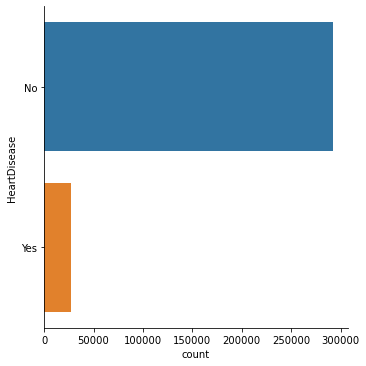

In [125]:
sb.catplot(y = "HeartDisease", data = heartdata, kind = "count")

In [126]:
negative, positive = heartdata['HeartDisease'].value_counts()
print("Ratio of classes is Positive : Negative = ", positive, ":", negative)

Ratio of classes is Positive : Negative =  27373 : 292422


In [127]:
heartdata['HeartDisease'].replace(('Yes', 'No'), (1, 0), inplace=True)

In [128]:
# Split the dataframe into two based on the values of 'HeartDisease'
one = heartdata.loc[heartdata['HeartDisease'] == 1]
zero = heartdata.loc[heartdata['HeartDisease'] == 0]

# Randomly sample the zero instances to match the number of ones
random_zero = zero.sample(n=len(one), replace=False)

# Concatenate the two dataframes
heartdata = pd.concat([one, random_zero])

In [129]:
heartdata['HeartDisease'].replace((1,0), ('Yes', 'No'), inplace=True)

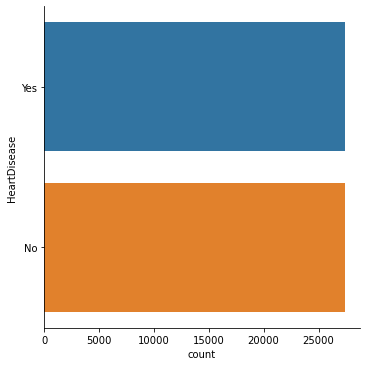

In [130]:
sb.catplot(y = "HeartDisease", data = heartdata, kind = "count")

In [131]:
heartdata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
10,Yes,34.30,Yes,No,No,30.0,0.0,Yes,Male,60-64,White,Yes,No,Poor,15.0,Yes,No,No
35,Yes,32.98,Yes,No,Yes,10.0,0.0,Yes,Male,75-79,White,Yes,Yes,Poor,4.0,No,No,Yes
42,Yes,25.06,No,No,No,0.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,7.0,No,No,Yes
43,Yes,30.23,Yes,No,No,6.0,2.0,Yes,Female,75-79,White,Yes,Yes,Fair,8.0,No,Yes,No


In [132]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54746 entries, 5 to 262637
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      54746 non-null  object 
 1   BMI               54746 non-null  float64
 2   Smoking           54746 non-null  object 
 3   AlcoholDrinking   54746 non-null  object 
 4   Stroke            54746 non-null  object 
 5   PhysicalHealth    54746 non-null  float64
 6   MentalHealth      54746 non-null  float64
 7   DiffWalking       54746 non-null  object 
 8   Sex               54746 non-null  object 
 9   AgeCategory       54746 non-null  object 
 10  Race              54746 non-null  object 
 11  Diabetic          54746 non-null  object 
 12  PhysicalActivity  54746 non-null  object 
 13  GenHealth         54746 non-null  object 
 14  SleepTime         54746 non-null  float64
 15  Asthma            54746 non-null  object 
 16  KidneyDisease     54746 non-null  objec

In [133]:
heartdata.nunique()

HeartDisease           2
BMI                 2521
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             22
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [134]:
for x in heartdata:
    if(heartdata[x].dtype == object):
        print("{0}\t{1}".format(x,heartdata[x].unique()))

HeartDisease	['Yes' 'No']
Smoking	['Yes' 'No']
AlcoholDrinking	['No' 'Yes']
Stroke	['No' 'Yes']
DiffWalking	['Yes' 'No']
Sex	['Female' 'Male']
AgeCategory	['75-79' '60-64' '80 or older' '70-74' '55-59' '65-69' '50-54' '45-49'
 '35-39' '40-44' '25-29' '30-34' '18-24']
Race	['Black' 'White' 'Other' 'American Indian/Alaskan Native' 'Asian'
 'Hispanic']
Diabetic	['No' 'Yes' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity	['No' 'Yes']
GenHealth	['Fair' 'Poor' 'Good' 'Very good' 'Excellent']
Asthma	['No' 'Yes']
KidneyDisease	['No' 'Yes']
SkinCancer	['No' 'Yes']


In [135]:
heartCat = heartdata.loc[:,heartdata.dtypes == object]
heartNum = heartdata.loc[:,heartdata.dtypes != object]

In [136]:
for x in heartCat:
   heartCat[x] = heartCat[x].replace({'No': 0, 'Yes': 1, 'No, borderline diabetes': 2, "Yes (during pregnancy)":3, "Female":0, "Male":1})
heartCat["GenHealth"] = heartCat["GenHealth"].replace({"Poor": 0, "Fair":1, "Good": 2 ,"Very good": 3, "Excellent":4})
heartCat["Race"] = heartCat["Race"].replace({'White': 0, 'Black':1,'Asian':3,'American Indian/Alaskan Native': 4, 'Hispanic':5, 'Other':6})
heartCat["AgeCategory"] = heartCat["AgeCategory"].replace({'80 or older': 0, '75-79': 1, '70-74': 2,  '65-69':3, '60-64':4, '55-59': 5,'50-54': 6, '45-49': 7, '40-44': 8, '35-39': 9,'30-34': 10, '25-29': 11, '18-24': 12})

<ipython-input-136-7c9b8f4ba2e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartCat[x] = heartCat[x].replace({'No': 0, 'Yes': 1, 'No, borderline diabetes': 2, "Yes (during pregnancy)":3, "Female":0, "Male":1})
<ipython-input-136-7c9b8f4ba2e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartCat["GenHealth"] = heartCat["GenHealth"].replace({"Poor": 0, "Fair":1, "Good": 2 ,"Very good": 3, "Excellent":4})
<ipython-input-136-7c9b8f4ba2e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a 

In [137]:
heartNum = pd.concat([heartNum, heartCat["HeartDisease"]], axis=1)

In [138]:
heartCat.head()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
5,1,1,0,0,1,0,1,1,0,0,1,0,0,0
10,1,1,0,0,1,1,4,0,1,0,0,1,0,0
35,1,1,0,1,1,1,1,0,1,1,0,0,0,1
42,1,0,0,0,1,0,0,0,1,0,2,0,0,1
43,1,1,0,0,1,0,1,0,1,1,1,0,1,0


In [139]:
heartNum.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,HeartDisease
5,28.87,6.0,0.0,12.0,1
10,34.30,30.0,0.0,15.0,1
35,32.98,10.0,0.0,4.0,1
42,25.06,0.0,0.0,7.0,1
43,30.23,6.0,2.0,8.0,1


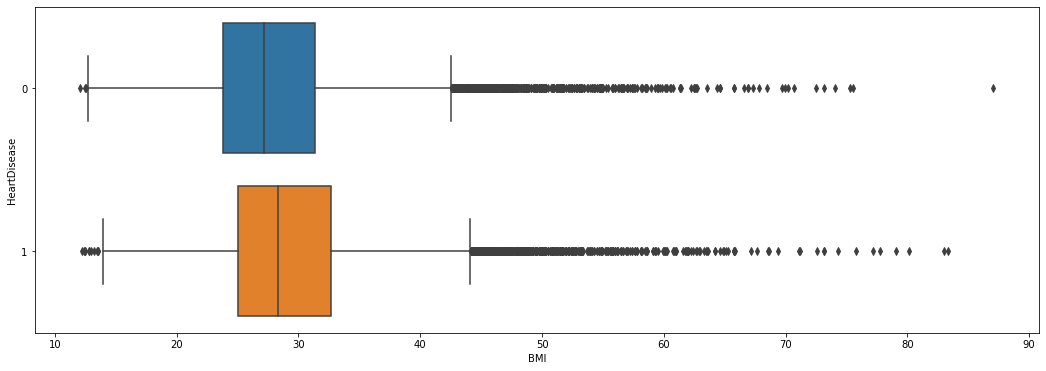

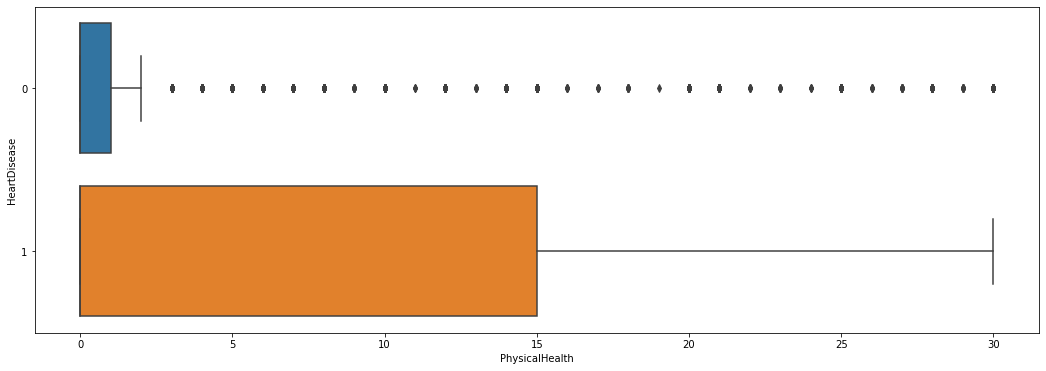

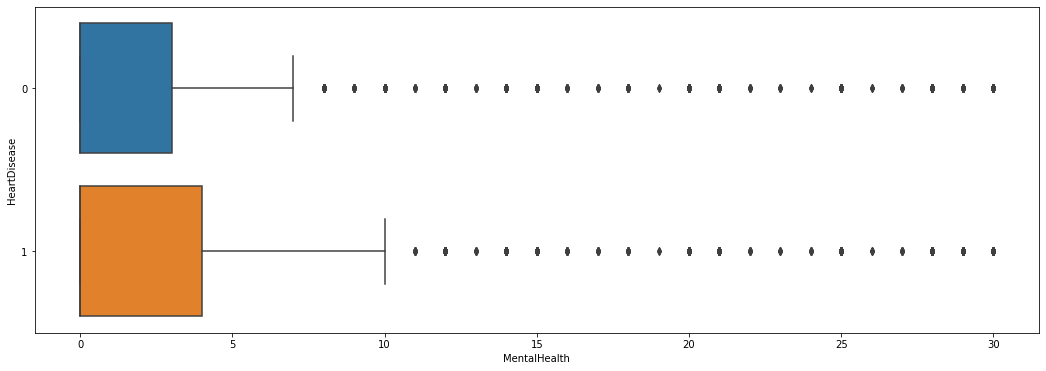

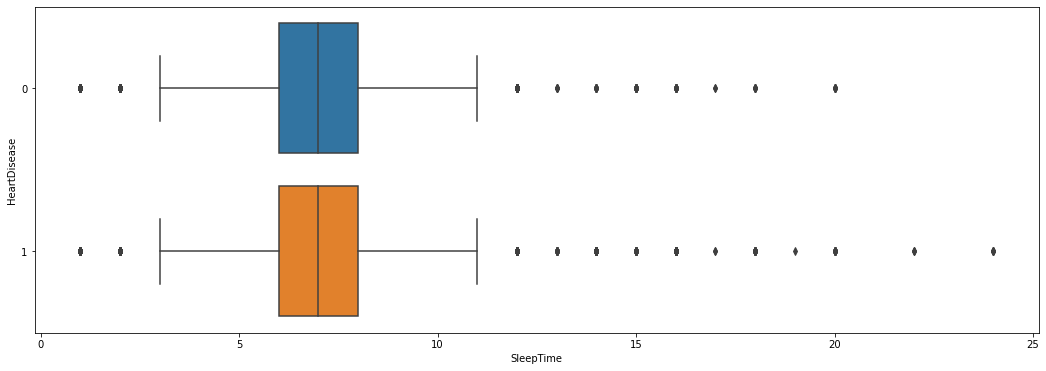

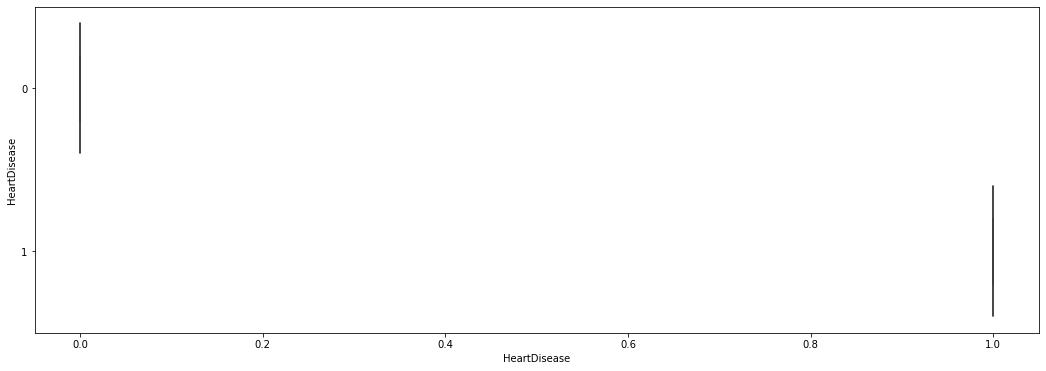

In [140]:
for x in heartNum:
    # Joint Boxplot of Total Train against Legendary Train
    f = plt.figure(figsize=(18, 6))
    sb.boxplot(x = x, y = "HeartDisease", data = heartNum, orient = "h")

In [141]:
def cramers_v(confusion_matrix):
    """Calculate Cramer's V statistic for categorical-categorical association."""
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    phi2 = chi2 / n
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1) ** 2) / (n-1)
    kcorr = k - ((k-1) ** 2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [142]:
for x in heartCat:
    confusion_matrix = pd.crosstab(heartCat['HeartDisease'], heartCat[x])
    # Compute Cramer's V
    cramers_v_score = cramers_v(confusion_matrix)
    print("Cramer's V score of {0}: {1}".format(x,cramers_v_score))

Cramer's V score of HeartDisease: 0.9999634669832618
Cramer's V score of Smoking: 0.18511503908293128
Cramer's V score of AlcoholDrinking: 0.061495835764808215
Cramer's V score of Stroke: 0.23013071605982394
Cramer's V score of DiffWalking: 0.29128748099419366
Cramer's V score of Sex: 0.12625263766127043
Cramer's V score of AgeCategory: 0.44098808064254685
Cramer's V score of Race: 0.10020356907764731
Cramer's V score of Diabetic: 0.27493482044234974
Cramer's V score of PhysicalActivity: 0.16717225585452564
Cramer's V score of GenHealth: 0.4035199202948826
Cramer's V score of Asthma: 0.06527963867716688
Cramer's V score of KidneyDisease: 0.18525681247109496
Cramer's V score of SkinCancer: 0.13947409508422864


In [143]:
selheartdata = pd.concat([heartCat[["HeartDisease","GenHealth","DiffWalking","Stroke"]],heartNum["PhysicalHealth"]],axis=1)

In [144]:
selheartdata.head()

,HeartDisease,GenHealth,DiffWalking,Stroke,PhysicalHealth
5,1,1,1,0,6.0
10,1,0,1,0,30.0
35,1,0,1,1,10.0
42,1,2,1,0,0.0
43,1,1,1,0,6.0


In [145]:
def removeOutlier(cleanData,columnName):
    Q1 = cleanData[columnName].quantile(0.25)
    Q3 = cleanData[columnName].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    # Create arrays of Boolean values indicating the outlier rows
    saleupperout = cleanData[columnName] >= upper
    salelowerout = cleanData[columnName] <= lower

    # Removing the outliers
    cleanData = cleanData[~saleupperout]
    cleanData = cleanData[~salelowerout]
    return cleanData

In [146]:
selheartdata.shape

(54746, 5)

In [147]:
cleaned_selected_heartdata = removeOutlier(selheartdata,"PhysicalHealth")

<ipython-input-145-680ca6aa2b1c>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleanData = cleanData[~salelowerout]


In [148]:
cleaned_selected_heartdata.shape

(45101, 5)

<AxesSubplot:xlabel='PhysicalHealth', ylabel='HeartDisease'>

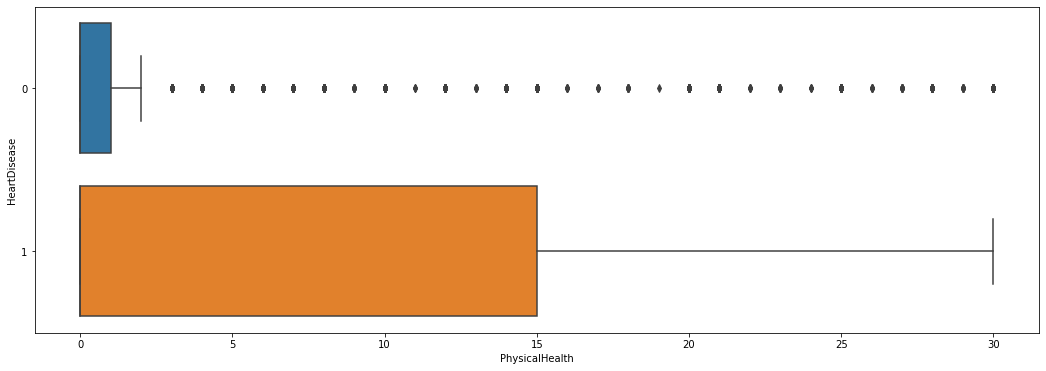

In [149]:
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "PhysicalHealth", y = "HeartDisease", data = heartNum, orient = "h")

In [150]:
cleaned_selected_heartdata.to_csv('selected_heartdata.csv', index=False)

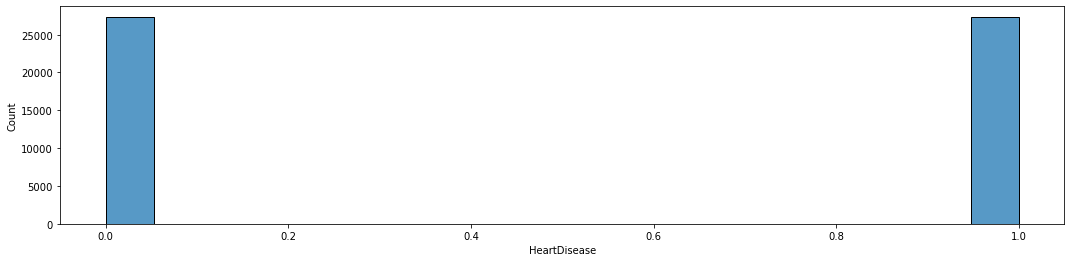

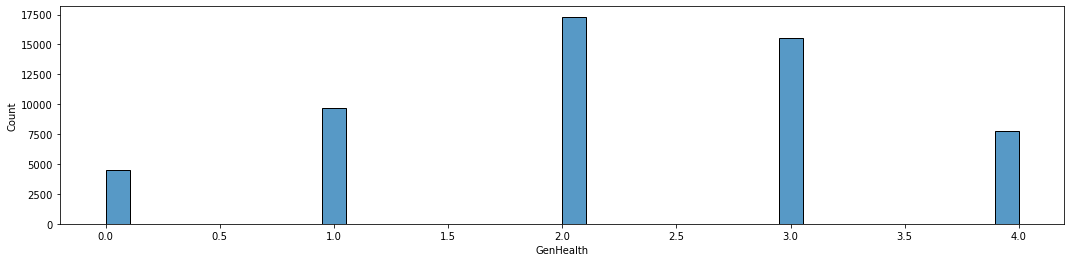

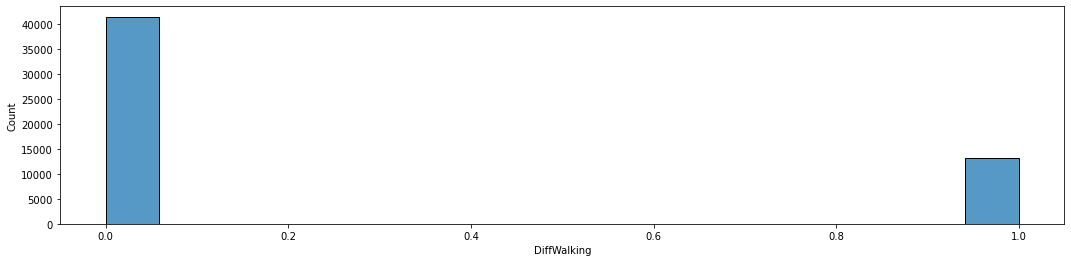

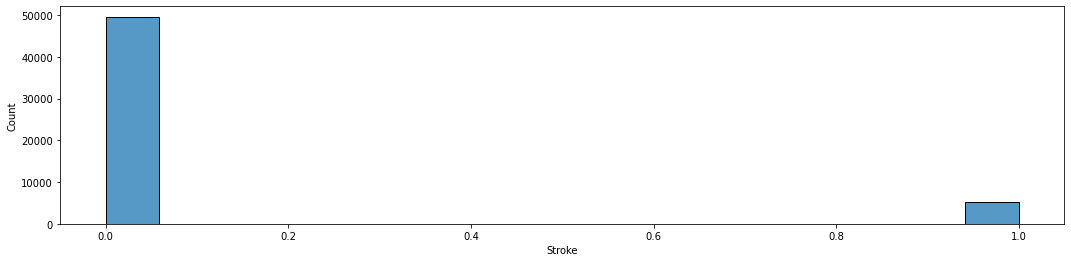

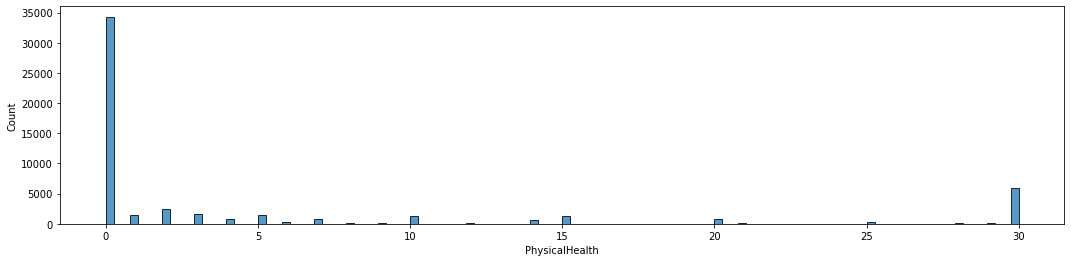

In [151]:
# Amount of the Credit
for x in selheartdata:
    f, axes = plt.subplots(1, 1, figsize=(18, 4))
    sb.histplot(data = selheartdata[x], ax = axes)

# Data Exploration

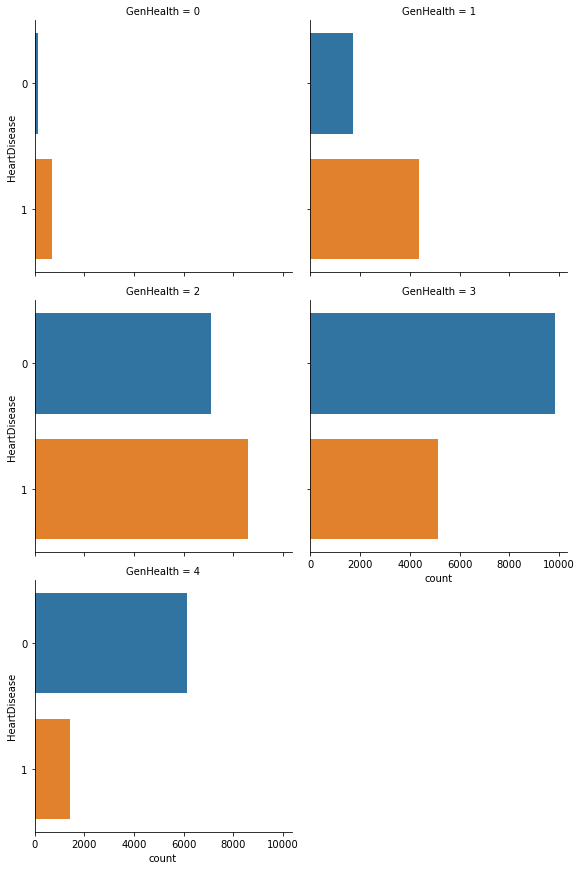

In [152]:
# HeartDisease over GenHealth
sb.catplot(y = 'HeartDisease', data = cleaned_selected_heartdata, col = 'GenHealth', kind = 'count', col_wrap = 2, height = 4)

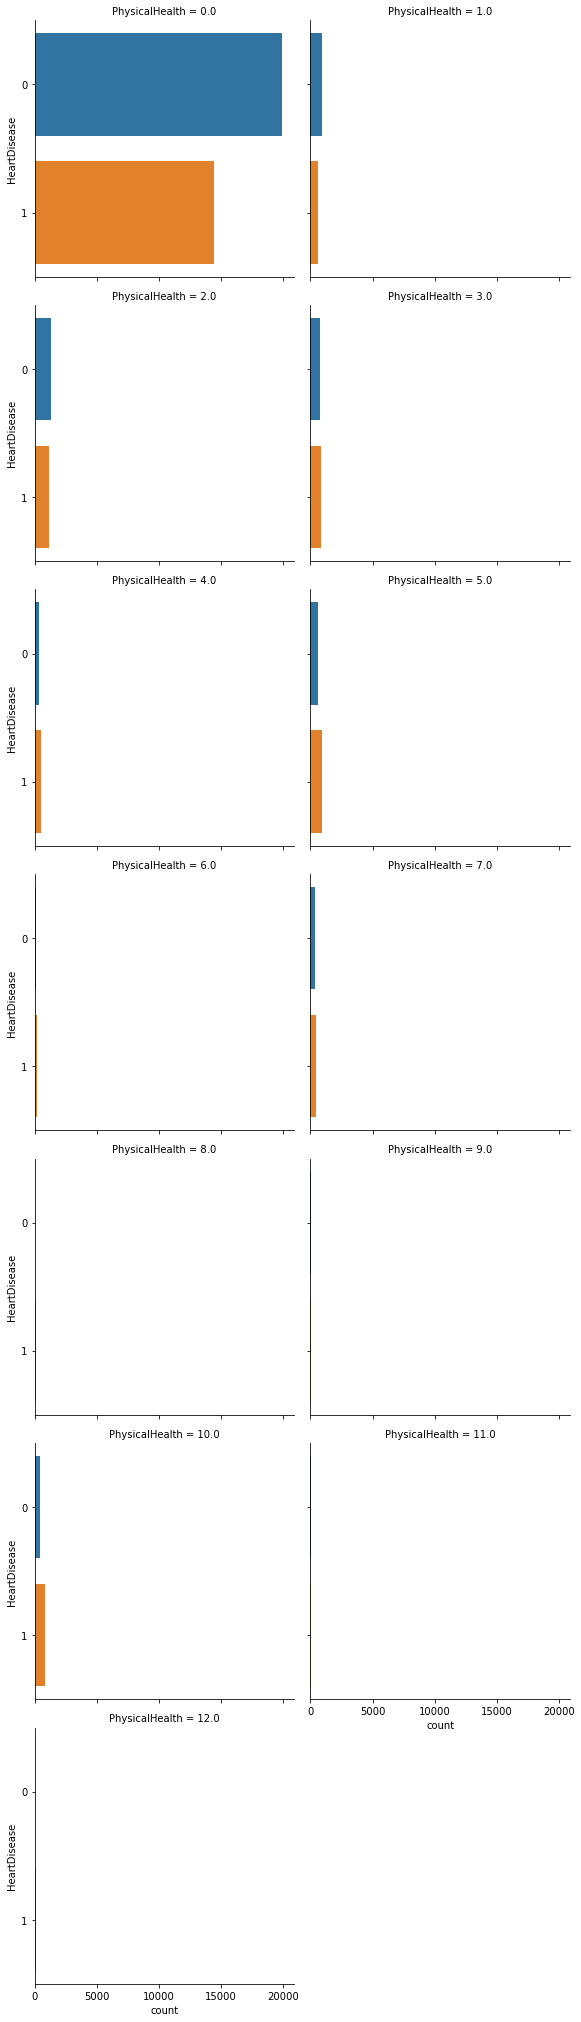

In [153]:
# HeartDisease over PhysicalHealth
sb.catplot(y = 'HeartDisease', data = cleaned_selected_heartdata, col = 'PhysicalHealth', kind = 'count', col_wrap = 2, height = 4)

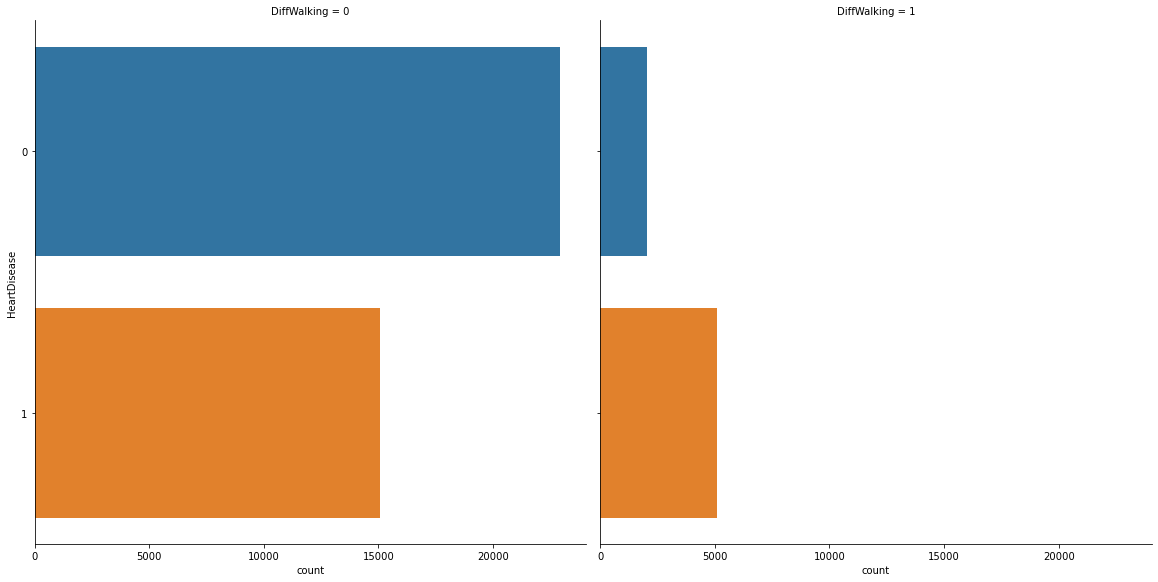

In [154]:
# HeartDisease over DiffWalking
sb.catplot(y = 'HeartDisease', data = cleaned_selected_heartdata, col = 'DiffWalking', kind = 'count', col_wrap = 2, height = 8)

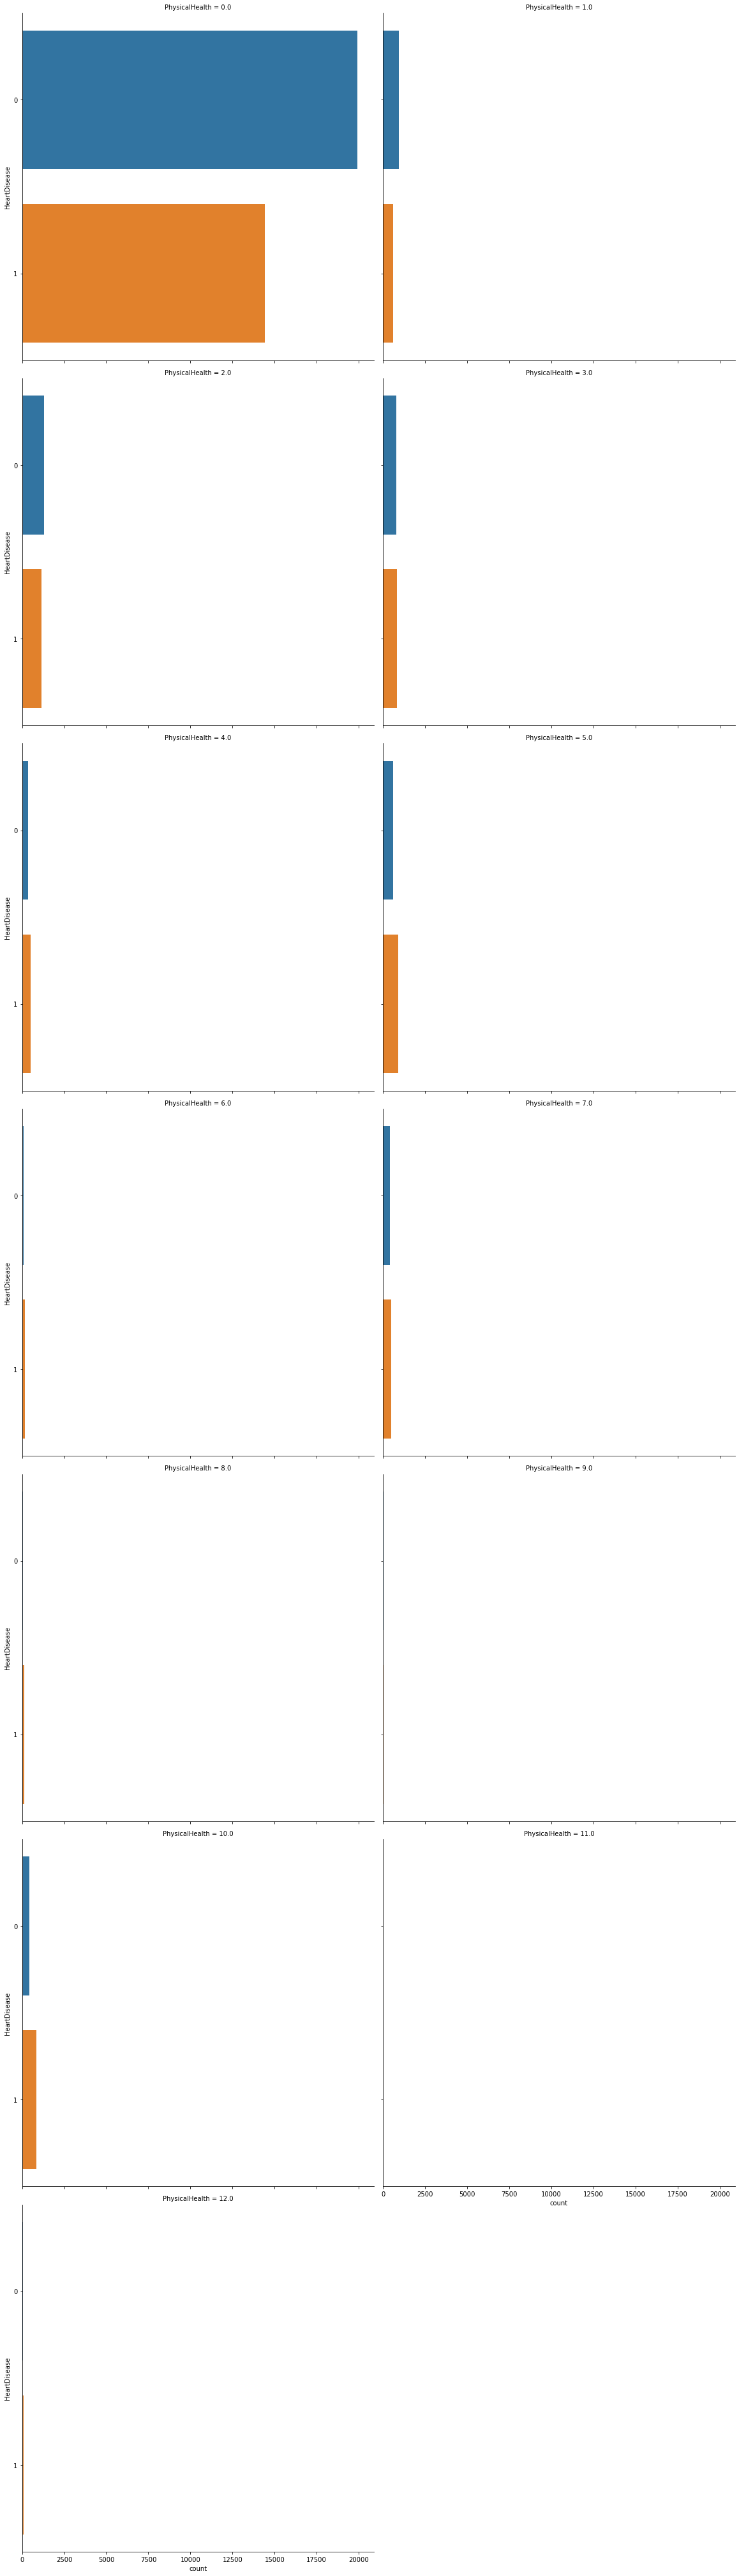

In [155]:
# HeartDisease over PhysicalHealth
sb.catplot(y = 'HeartDisease', data = cleaned_selected_heartdata, col = 'PhysicalHealth', kind = 'count', col_wrap = 2, height = 8)